# Load in Data

In [1]:
import warnings
warnings.simplefilter('ignore')
import pdb

import pandas as pd 
import os
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

# Load in Data
df_spec = pd.read_csv('../data/raw_data/metadata.csv')
df_energy_ldn = pd.read_csv('../data/raw_data/hourly_generation_ldn.csv')

# rename of change type
df_energy_ldn.rename(columns={'datetime': 'timestamp'}, inplace=True)
df_energy_ldn['timestamp'] = pd.to_datetime(df_energy_ldn['timestamp'], utc=True)

# Merge spec with energy
df_merged = pd.merge(df_energy_ldn,df_spec,how='left',on='ss_id')
df_merged['formatted_timestamp'] = df_merged['timestamp'].dt.strftime('%Y-%m-%dT%H:%M')

print(len(df_merged))
df_merged.head(5)


2100888


,generation_wh,timestamp,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at,formatted_timestamp
0,100.00,2015-05-31 16:00:00+00:00,7344,51.42,-0.19,E01003458,180.0,35.0,1.52,2013-04-18,2015-05-31T16:00
1,149.92,2015-05-31 16:00:00+00:00,7035,51.42,-0.29,E01002938,180.0,38.0,1.92,2012-12-18,2015-05-31T16:00
2,250.08,2015-05-31 16:00:00+00:00,7173,51.51,-0.41,E01002505,200.0,24.0,2.00,2013-02-25,2015-05-31T16:00
3,99.60,2015-05-31 16:00:00+00:00,7158,51.57,-0.36,E01002241,225.0,40.0,1.25,2013-01-26,2015-05-31T16:00
4,39.35,2015-05-31 16:00:00+00:00,6871,51.56,0.17,E01000038,270.0,30.0,4.00,2012-11-16,2015-05-31T16:00


# Merge with weather data

In [2]:
# import json
# import requests

# base_url = "https://archive-api.open-meteo.com/v1/archive"
# params = {
#     "latitude": 51.42,
#     "longitude": -0.19,
#     "start_date": "2013-04-18",
#     "end_date": "2021-09-30",
#     "hourly": ["temperature_2m", "weather_code", "cloud_cover", "is_day", "shortwave_radiation", "direct_radiation", "diffuse_radiation", "direct_normal_irradiance", "global_tilted_irradiance", "terrestrial_radiation"],
#     "timezone": "Europe/London"
# }

# response = requests.get(base_url, params)
# data = response.json()

# # Write the JSON data to a file
# with open('ldn_api_latest.json', 'w') as f:
#         json.dump(data, f, indent=4)

### Define Functions and variables

In [2]:
# Define list of properties to iterate through as chunks
id_list = df_merged.ss_id.unique()

# define hourly parameters to loop through each chunk
hourly_params = ["temperature_2m", "weather_code", "cloud_cover", "is_day", "shortwave_radiation", "direct_radiation", "diffuse_radiation", "direct_normal_irradiance", "global_tilted_irradiance", "terrestrial_radiation"]

# Preprocess hourly time data to create an index mapping timestamps to indices
data = pd.read_json('../data/raw_data/weather_api.json')
hourly_time = data['hourly']['time']
timestamp_index = {timestamp: idx for idx, timestamp in enumerate(hourly_time)}

# Modify the get_solar_feature function to use the index mapping
def get_solar_feature(row, param, data, timestamp_index):
    solar_feature = data['hourly'][param]
    timestamp = row['formatted_timestamp']

    # Check if timestamp exists in the index
    if timestamp in timestamp_index:
        idx = timestamp_index[timestamp]
        return solar_feature[idx]
    else:
        return np.nan

### Iterate through params and property ID

In [7]:
# # Wrap entire code into for loop to iterate through each property
# for id in id_list:
#     df_merged_multiple = df_merged[df_merged['ss_id']== id]

#     data = pd.read_json('../data/raw_data/weather_api.json')
    
#     # loop through each weather param and populate weather features to DF
#     for param in hourly_params:
#         df_merged_multiple[param] = df_merged_multiple.apply(lambda row: get_solar_feature(row, param, data, timestamp_index), axis=1)
#     print(f'completed property id:{id}')

#     # Export DataFrame to CSV and concatenate
#     csv_filename = f"../data/raw_data/ldn_energy_supply.csv"
#     if os.path.exists(csv_filename):
#         df_merged_multiple.to_csv(csv_filename, mode='a', header=False, index=False)
#     else:
#         df_merged_multiple.to_csv(csv_filename, index=False)
        
# print('--------chunking complete!------')
# df_merged_multiple.head()


completed property id:7344
completed property id:7035
completed property id:7173
completed property id:7158
completed property id:6871
completed property id:6780
completed property id:6929
completed property id:6609
completed property id:6616
completed property id:2729
completed property id:2783
completed property id:2786
completed property id:3805
completed property id:3435
completed property id:3470
completed property id:3021
completed property id:3271
completed property id:3281
completed property id:3239
completed property id:3087
completed property id:3086
completed property id:13387
completed property id:7060
completed property id:27057
completed property id:26999
completed property id:26976
completed property id:26967
completed property id:26972
completed property id:26975
completed property id:27000
completed property id:27035
completed property id:27046
completed property id:27049
completed property id:27008
completed property id:27020
completed property id:26881
completed prop

,generation_wh,timestamp,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at,...,temperature_2m,weather_code,cloud_cover,is_day,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,global_tilted_irradiance,terrestrial_radiation
136008,0.0,2020-03-02 23:00:00+00:00,26924,51.44,-0.33,E01003882,220.0,37.0,1.8,2018-04-18,...,2.3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
136037,0.0,2020-03-03 00:00:00+00:00,26924,51.44,-0.33,E01003882,220.0,37.0,1.8,2018-04-18,...,2.4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
136068,0.0,2020-03-03 01:00:00+00:00,26924,51.44,-0.33,E01003882,220.0,37.0,1.8,2018-04-18,...,2.2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
136115,0.0,2020-03-03 02:00:00+00:00,26924,51.44,-0.33,E01003882,220.0,37.0,1.8,2018-04-18,...,1.9,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0
136147,0.0,2020-03-03 03:00:00+00:00,26924,51.44,-0.33,E01003882,220.0,37.0,1.8,2018-04-18,...,1.7,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# # DEBUGGING CODE

# data = pd.read_json('../data/raw_data/weather_api.json')
# df_merged_sample = df_merged[df_merged['ss_id']== id_list[0]]

# # debug row formatted timestamp
# print(f'01 df_timestamp: {df_merged_sample.formatted_timestamp[0]}')

# # debug hourly_time
# hourly_time = np.array(data['hourly']['time'])
# print(f'02 list of json dates: {hourly_time[0:5]}')

# # debug solar feature
# solar_feature = data['hourly']['temperature_2m']
# print(f'03 list of solar features: {solar_feature[0:5]}')

# idx = np.where(hourly_time == '2013-04-18T01:00')
# print(f'04 index for json data: {idx[0]}')

# print(solar_feature[idx[0][0]])

01 df_timestamp: 2015-05-31T16:00
02 list of json dates: ['2013-04-18T00:00' '2013-04-18T01:00' '2013-04-18T02:00'
 '2013-04-18T03:00' '2013-04-18T04:00']
03 list of solar features: [9.7, 9.2, 8.8, 8.5, 8.4]
04 index for json data: [1]
9.2


In [20]:
training_data = pd.read_csv('../data/raw_data/ldn_energy_supply.csv')
training_data

,generation_wh,timestamp,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at,...,temperature_2m,weather_code,cloud_cover,is_day,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,global_tilted_irradiance,terrestrial_radiation
0,100.00,2015-05-31 16:00:00+00:00,7344,51.42,-0.19,E01003458,180.0,35.0,1.52,2013-04-18,...,13.6,2.0,80.0,1.0,166.0,31.0,135.0,48.5,166.0,851.4
1,82.58,2015-05-31 17:00:00+00:00,7344,51.42,-0.19,E01003458,180.0,35.0,1.52,2013-04-18,...,13.1,3.0,96.0,1.0,168.0,34.0,134.0,66.8,168.0,677.2
2,0.00,2015-05-31 18:00:00+00:00,7344,51.42,-0.19,E01003458,180.0,35.0,1.52,2013-04-18,...,12.5,1.0,48.0,1.0,122.0,33.0,89.0,90.8,122.0,483.4
3,0.00,2015-05-31 19:00:00+00:00,7344,51.42,-0.19,E01003458,180.0,35.0,1.52,2013-04-18,...,11.9,1.0,47.0,1.0,108.0,57.0,51.0,267.9,108.0,283.2
4,0.00,2015-05-31 20:00:00+00:00,7344,51.42,-0.19,E01003458,180.0,35.0,1.52,2013-04-18,...,11.0,2.0,61.0,1.0,31.0,12.0,19.0,113.9,31.0,90.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100883,0.00,2021-08-31 23:00:00+00:00,26924,51.44,-0.33,E01003882,220.0,37.0,1.80,2018-04-18,...,14.1,3.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2100884,0.00,2021-09-01 00:00:00+00:00,26924,51.44,-0.33,E01003882,220.0,37.0,1.80,2018-04-18,...,14.5,2.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2100885,0.00,2021-09-01 01:00:00+00:00,26924,51.44,-0.33,E01003882,220.0,37.0,1.80,2018-04-18,...,14.0,3.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2100886,0.00,2021-09-01 02:00:00+00:00,26924,51.44,-0.33,E01003882,220.0,37.0,1.80,2018-04-18,...,13.8,3.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Time Series Modelling

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [21]:
# Create DataFrame for Prophet with target, timestamp, and additional features
training_data = training_data.copy()
training_data.rename(columns={'generation_wh': 'y','formatted_timestamp': 'ds'}, inplace=True)

training_data.head()

,y,timestamp,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at,...,temperature_2m,weather_code,cloud_cover,is_day,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,global_tilted_irradiance,terrestrial_radiation
0,100.00,2015-05-31 16:00:00+00:00,7344,51.42,-0.19,E01003458,180.0,35.0,1.52,2013-04-18,...,13.6,2.0,80.0,1.0,166.0,31.0,135.0,48.5,166.0,851.4
1,82.58,2015-05-31 17:00:00+00:00,7344,51.42,-0.19,E01003458,180.0,35.0,1.52,2013-04-18,...,13.1,3.0,96.0,1.0,168.0,34.0,134.0,66.8,168.0,677.2
2,0.00,2015-05-31 18:00:00+00:00,7344,51.42,-0.19,E01003458,180.0,35.0,1.52,2013-04-18,...,12.5,1.0,48.0,1.0,122.0,33.0,89.0,90.8,122.0,483.4
3,0.00,2015-05-31 19:00:00+00:00,7344,51.42,-0.19,E01003458,180.0,35.0,1.52,2013-04-18,...,11.9,1.0,47.0,1.0,108.0,57.0,51.0,267.9,108.0,283.2
4,0.00,2015-05-31 20:00:00+00:00,7344,51.42,-0.19,E01003458,180.0,35.0,1.52,2013-04-18,...,11.0,2.0,61.0,1.0,31.0,12.0,19.0,113.9,31.0,90.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100883,0.00,2021-08-31 23:00:00+00:00,26924,51.44,-0.33,E01003882,220.0,37.0,1.80,2018-04-18,...,14.1,3.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2100884,0.00,2021-09-01 00:00:00+00:00,26924,51.44,-0.33,E01003882,220.0,37.0,1.80,2018-04-18,...,14.5,2.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2100885,0.00,2021-09-01 01:00:00+00:00,26924,51.44,-0.33,E01003882,220.0,37.0,1.80,2018-04-18,...,14.0,3.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2100886,0.00,2021-09-01 02:00:00+00:00,26924,51.44,-0.33,E01003882,220.0,37.0,1.80,2018-04-18,...,13.8,3.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# plt.plot(training_data['ds'], training_data['y'], color='blue', linestyle='-')

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train_size = 0.8  # 80% train, 20% test
train, test = train_test_split(training_data, test_size=1-train_size, shuffle=False)

# Verify the shapes of the train and test sets
train.shape, test.shape

((1680710, 21), (420178, 21))

In [24]:
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model.fit(train)

22:56:00 - cmdstanpy - INFO - Chain [1] start processing
23:02:37 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
# Set the number of periods into the future for prediction
horizon = 36

# Create a DataFrame with future timestamps for prediction
future = model.make_future_dataframe(periods=horizon, freq='MS')

# Generate predictions for the future timestamps
forecast = model.predict(future)

# Display the last few rows of the forecast DataFrame, including timestamps and predicted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
87634,2024-05-01 23:00:00,32.998639,-882.102788,951.017368
87635,2024-06-01 23:00:00,27.473111,-812.801781,808.901249
87636,2024-07-01 23:00:00,39.134174,-1101.257505,1183.484593
87637,2024-08-01 23:00:00,33.214336,-998.220976,1039.506689
87638,2024-09-01 23:00:00,8.075750,-397.146378,403.527310


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x33f2891b0>.

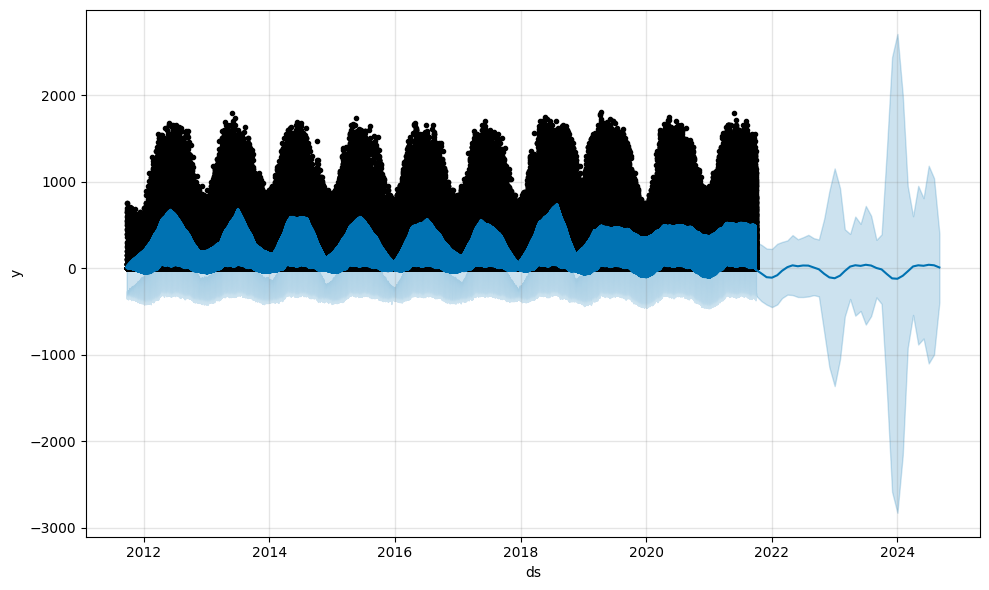

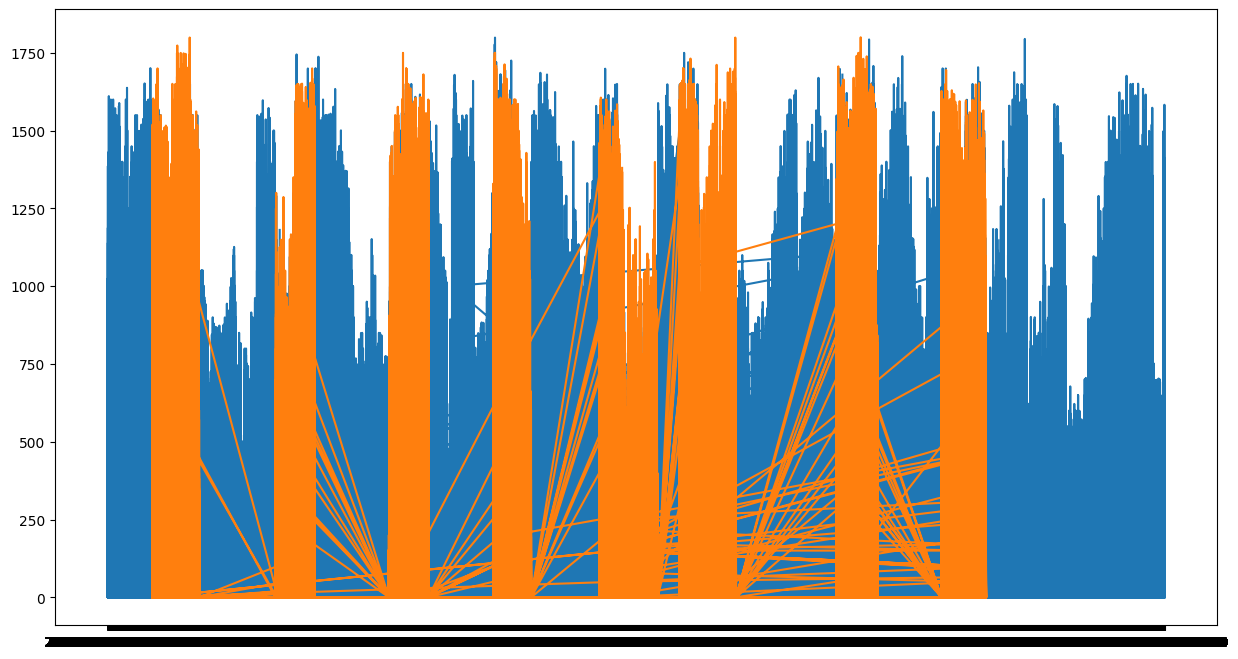

In [26]:
# Plot the prediction
ax = model.plot(forecast);
plt.figure(figsize=(15, 8))
plt.plot(train['ds'], train['y'], label="Train")
plt.plot(test['ds'], test['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="Predictions")
plt.legend(loc="best")

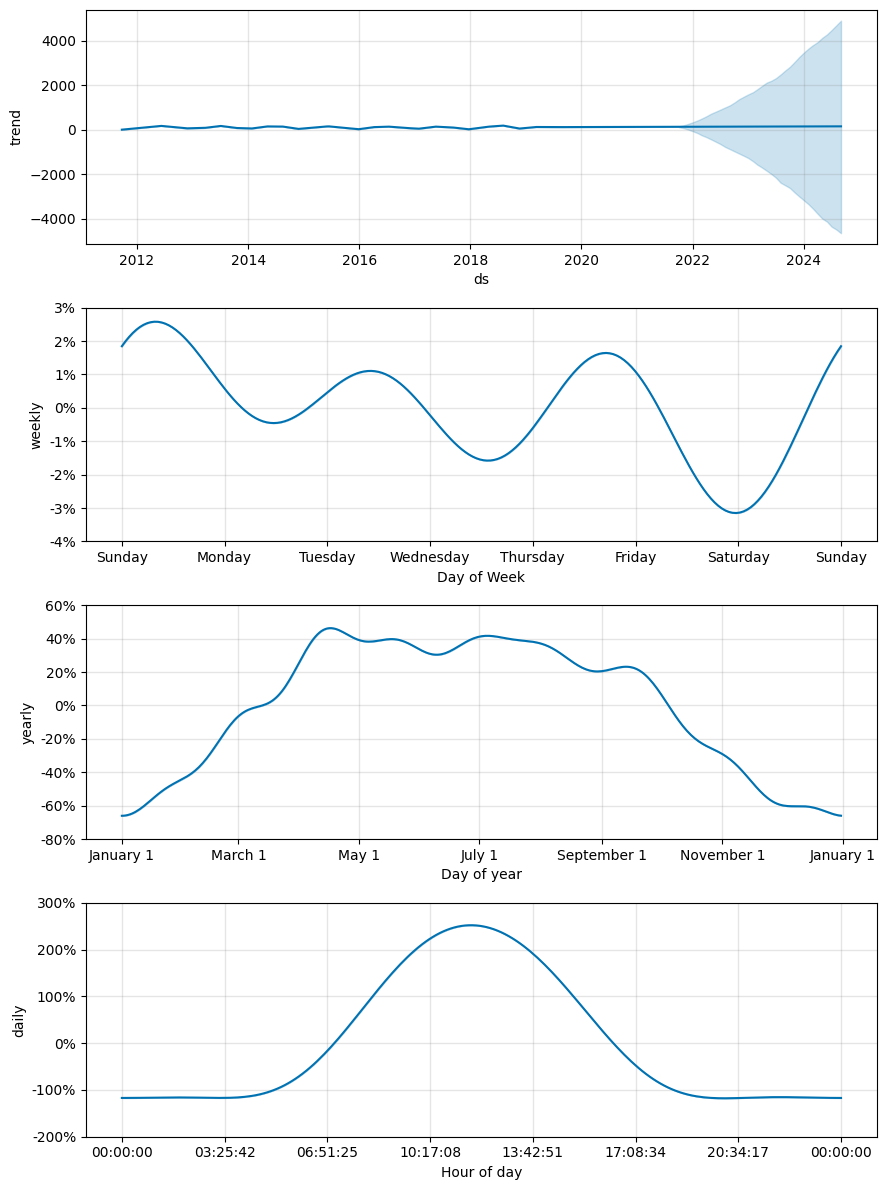

In [27]:
# Trend and seasonality
model.plot_components(forecast);